In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

(< cv2.DMatch 0x7fba185cfcb0>, < cv2.DMatch 0x7fba185cfd70>)
318.4022521972656


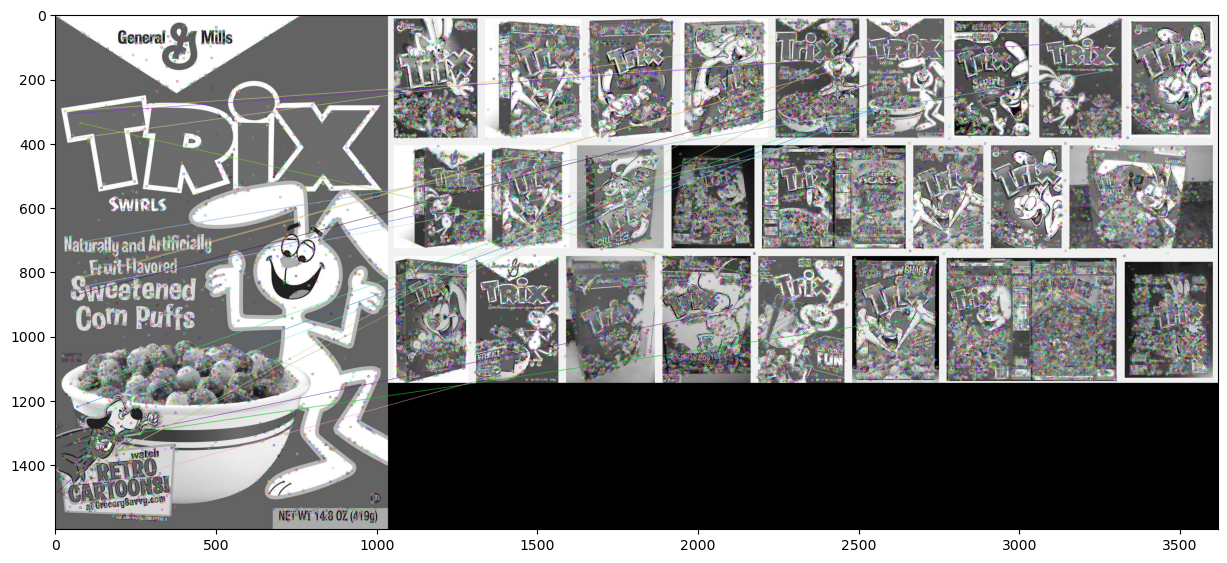

In [3]:
# Örnek 4.15: Feature Matching (Öznitelik Eşleştirme) - 2

searchIMG = cv2.imread('../DATA/30_trix.jpg',0)
targetIMG = cv2.imread('../DATA/29_trix_asile.png',0)

sift = cv2.xfeatures2d.SIFT_create()
keypointsSearch, descriptorsSearch = sift.detectAndCompute(searchIMG,mask=None)
keypointsTarget, descriptorsTarget = sift.detectAndCompute(targetIMG,mask=None)

bf = cv2.BFMatcher() # create bruteforce matcher object
matches = bf.knnMatch(descriptorsSearch,descriptorsTarget,k=2) #en yakin komsu eslestirmesi
print(matches[0])
print(matches[0][0].distance)

goodMatches = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        goodMatches.append([match1])

result = cv2.drawMatchesKnn(searchIMG,keypointsSearch,targetIMG,keypointsTarget,goodMatches[:20],outImg=None,flags=0)

f, eksen = plt.subplots(1,1,figsize=(15,15))
eksen.imshow(result)